In [12]:
import pandas as pd
import numpy as np


train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

print("Training data shape:", train_df.shape)
print("\nTraining data columns:")
print(train_df.columns.tolist())

print("\nTest data shape:", test_df.shape)

print("\nFirst few rows of training data:")
print(train_df.head())

print("\nTarget variable (SalePrice) statistics:")
print(train_df['SalePrice'].describe())

Training data shape: (1460, 81)

Training data columns:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'Enclosed

**Analyzing key features and their correlations to enhance our linear regression model for house price prediction.**

In [13]:
# Examine the key features we'll use for the linear regression
key_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']

print("Key features for our model:")
for feature in key_features:
    print(f"\n{feature} statistics:")
    print(train_df[feature].describe())
    print(f"Missing values: {train_df[feature].isnull().sum()}")

# Check correlations with SalePrice
print("\nCorrelations with SalePrice:")
for feature in key_features:
    correlation = train_df[feature].corr(train_df['SalePrice'])
    print(f"{feature}: {correlation:.3f}")

# Check for any additional bathroom features
bathroom_features = [col for col in train_df.columns if 'bath' in col.lower()]
print(f"\nAll bathroom-related features: {bathroom_features}")

# Look at basement bathrooms too
print("\nBasement bathroom statistics:")
print("BsmtFullBath:", train_df['BsmtFullBath'].describe())
print("BsmtHalfBath:", train_df['BsmtHalfBath'].describe())

Key features for our model:

GrLivArea statistics:
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
Missing values: 0

BedroomAbvGr statistics:
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64
Missing values: 0

FullBath statistics:
count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64
Missing values: 0

HalfBath statistics:
count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
Missing values: 0

Corre

**Relationship between house features and sale price**

In [14]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the training data
df = pd.read_csv('/content/train.csv')

# Calculate total bathrooms (FullBath + HalfBath)
df['TotalBath'] = df['FullBath'] + df['HalfBath']

# Create scatter plot showing SalePrice vs GrLivArea
# Color points by number of bedrooms and size by total bathrooms
fig = px.scatter(df,
                x='GrLivArea',
                y='SalePrice',
                color='BedroomAbvGr',
                size='TotalBath',
                title='Price vs Square Footage',
                color_continuous_scale=['#1FB8CD', '#DB4545', '#2E8B57', '#5D878F', '#D2BA4C'],
                hover_data=['BedroomAbvGr', 'TotalBath'])

# Update axis labels (keeping under 15 character limit)
fig.update_xaxes(title='Sq Footage')
fig.update_yaxes(title='Sale Price')

# Format price axis to show values in thousands
fig.update_yaxes(tickformat='$.0s')

# Update colorbar title
fig.update_coloraxes(colorbar_title_text="Bedrooms")

# Update marker size scaling for better visibility
fig.update_traces(marker=dict(sizemin=5, sizeref=0.5))



**implement and evaluate a linear regression model for house price prediction.**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


In [18]:
# Load the datasets
try:
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    print("Data loaded successfully!")
    print(f"Training data shape: {train_df.shape}")
    print(f"Test data shape: {test_df.shape}")
except FileNotFoundError:
    print("Please upload train.csv and test.csv files to your Colab environment")
    print("You can upload files using the folder icon in the left sidebar")

Data loaded successfully!
Training data shape: (1460, 81)
Test data shape: (1459, 80)


In [20]:
## Exploratory Data Analysis


# Display basic information about the dataset
print("Dataset Info:")
print(train_df.info())

print("\\nFirst 5 rows of training data:")
print(train_df.head())

print("\\nSalePrice statistics:")
print(train_df['SalePrice'].describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  

In [21]:
# Focus on our key features
key_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']
house_data = train_df[key_features].copy()


In [22]:
# Create total bathroom feature
house_data['TotalBathrooms'] = house_data['FullBath'] + house_data['HalfBath'] * 0.5

print("Key features data:")
print(house_data.head(10))

print("\\nMissing values:")
print(house_data.isnull().sum())

Key features data:
   GrLivArea  BedroomAbvGr  FullBath  HalfBath  SalePrice  TotalBathrooms
0       1710             3         2         1     208500             2.5
1       1262             3         2         0     181500             2.0
2       1786             3         2         1     223500             2.5
3       1717             3         1         0     140000             1.0
4       2198             4         2         1     250000             2.5
5       1362             1         1         1     143000             1.5
6       1694             3         2         0     307000             2.0
7       2090             3         2         1     200000             2.5
8       1774             2         2         0     129900             2.0
9       1077             2         1         0     118000             1.0
\nMissing values:
GrLivArea         0
BedroomAbvGr      0
FullBath          0
HalfBath          0
SalePrice         0
TotalBathrooms    0
dtype: int64


**Data Visualization**

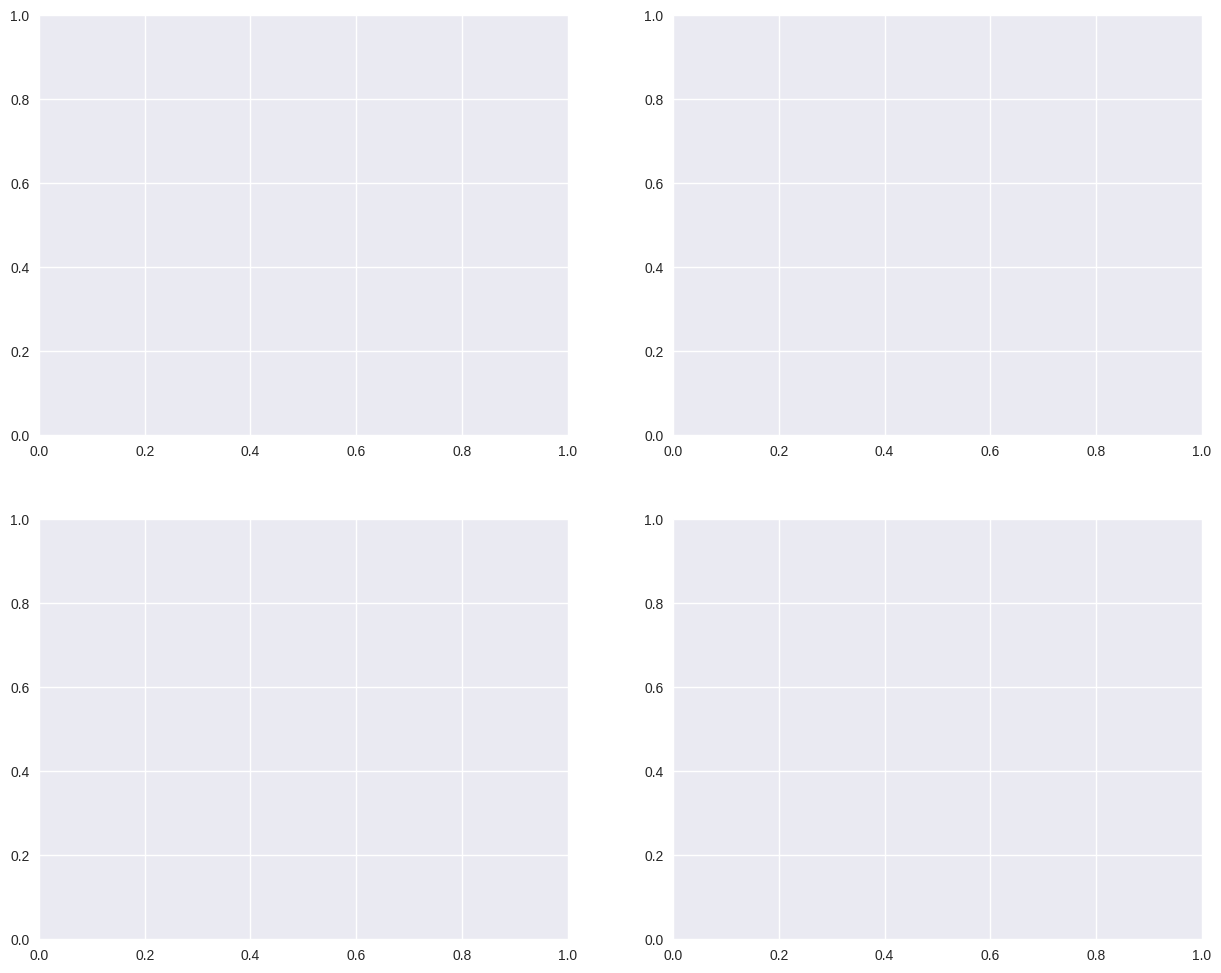

In [23]:
# Create visualization of our key features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))


In [24]:
# Square footage vs Price
axes[0,0].scatter(house_data['GrLivArea'], house_data['SalePrice'], alpha=0.6, color='blue')
axes[0,0].set_xlabel('Square Footage (GrLivArea)')
axes[0,0].set_ylabel('Sale Price')
axes[0,0].set_title('Square Footage vs Sale Price')


Text(0.5, 1.0, 'Square Footage vs Sale Price')

In [25]:
# Bedrooms vs Price
axes[0,1].scatter(house_data['BedroomAbvGr'], house_data['SalePrice'], alpha=0.6, color='green')
axes[0,1].set_xlabel('Number of Bedrooms')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Bedrooms vs Sale Price')



Text(0.5, 1.0, 'Bedrooms vs Sale Price')

In [26]:
# Total bathrooms vs Price
axes[1,0].scatter(house_data['TotalBathrooms'], house_data['SalePrice'], alpha=0.6, color='red')
axes[1,0].set_xlabel('Total Bathrooms')
axes[1,0].set_ylabel('Sale Price')
axes[1,0].set_title('Total Bathrooms vs Sale Price')


Text(0.5, 1.0, 'Total Bathrooms vs Sale Price')

In [27]:
# Distribution of Sale Price
axes[1,1].hist(house_data['SalePrice'], bins=50, alpha=0.7, color='purple')
axes[1,1].set_xlabel('Sale Price')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Distribution of Sale Price')

plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

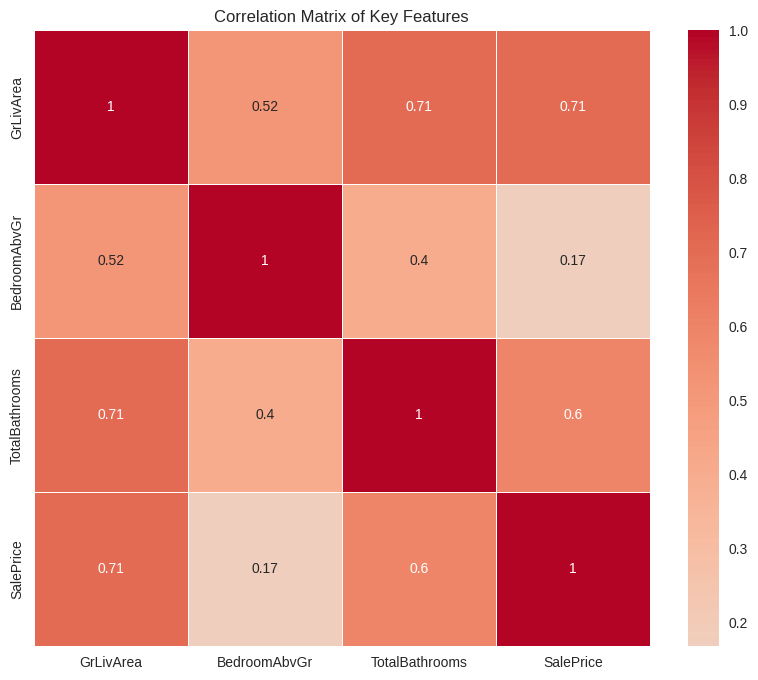

\nCorrelation with SalePrice:
GrLivArea: 0.709
TotalBathrooms: 0.598
BedroomAbvGr: 0.168


In [28]:
# Correlation matrix
correlation_matrix = house_data[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms', 'SalePrice']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Key Features')
plt.show()

print("\\nCorrelation with SalePrice:")
correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)
for feature, corr in correlations.items():
    if feature != 'SalePrice':
        print(f"{feature}: {corr:.3f}")

**Data Preprocessing**

In [34]:
# Prepare features and target variable
X = house_data[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']].copy()
y = house_data['SalePrice'].copy()

print("Feature matrix shape:", X.shape)
print("Target variable shape:", y.shape)

print("\\nFeature statistics:")
print(X.describe())

Feature matrix shape: (1460, 3)
Target variable shape: (1460,)
\nFeature statistics:
         GrLivArea  BedroomAbvGr  TotalBathrooms
count  1460.000000   1460.000000     1460.000000
mean   1515.463699      2.866438        1.756507
std     525.480383      0.815778        0.636015
min     334.000000      0.000000        0.000000
25%    1129.500000      2.000000        1.000000
50%    1464.000000      3.000000        2.000000
75%    1776.750000      3.000000        2.500000
max    5642.000000      8.000000        3.500000


**Split data into training and testing sets**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)


print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training set percentage: {len(X_train)/len(X)*100:.1f}%")
print(f"Test set percentage: {len(X_test)/len(X)*100:.1f}%")

Training set size: 1168 samples
Test set size: 292 samples
Training set percentage: 80.0%
Test set percentage: 20.0%


**Model** **Training**

In [36]:
# Create and train the linear regression model
model = LinearRegression()

In [37]:
# Fit the model
model.fit(X_train, y_train)

print("Model training completed!")
print(f"Model intercept: ${model.intercept_:,.2f}")
print("\\nModel coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: ${coef:,.2f}")

Model training completed!
Model intercept: $56,862.58
\nModel coefficients:
GrLivArea: $100.64
BedroomAbvGr: $-26,645.53
TotalBathrooms: $27,083.21


In [38]:
# Create the regression equation
equation = f"Price = {model.intercept_:,.0f}"
for feature, coef in zip(X.columns, model.coef_):
    sign = "+" if coef >= 0 else ""
    equation += f" {sign} {coef:,.0f} × {feature}"

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
Price = 56,863 + 101 × GrLivArea  -26,646 × BedroomAbvGr + 27,083 × TotalBathrooms


**Model Evaluation**

In [39]:
# Make predictions on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [40]:
# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Training RMSE: ${train_rmse:,.2f}")
print(f"Test RMSE: ${test_rmse:,.2f}")
print(f"Training MAE: ${train_mae:,.2f}")
print(f"Test MAE: ${test_mae:,.2f}")

MODEL PERFORMANCE METRICS
Training R² Score: 0.5623
Test R² Score: 0.6286
Training RMSE: $51,092.94
Test RMSE: $53,371.56
Training MAE: $35,269.01
Test MAE: $36,569.64


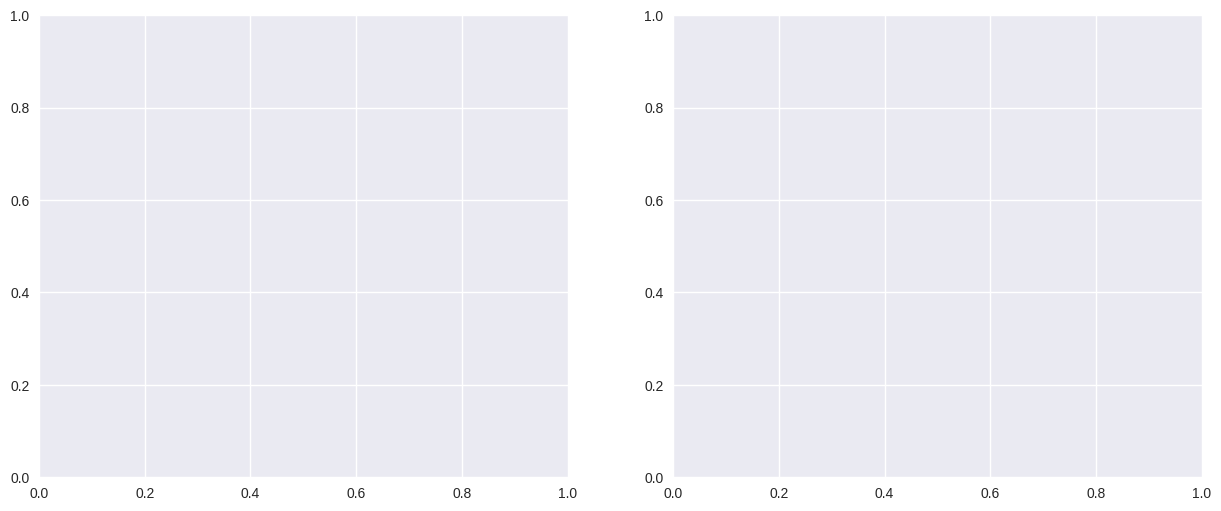

In [41]:
# Visualize predictions vs actual values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

In [42]:
# Training set predictions
ax1.scatter(y_train, y_train_pred, alpha=0.6, color='blue')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Predicted Price')
ax1.set_title(f'Training Set: Actual vs Predicted\\nR² = {train_r2:.4f}')

Text(0.5, 1.0, 'Training Set: Actual vs Predicted\\nR² = 0.5623')

In [43]:
# Test set predictions
ax2.scatter(y_test, y_test_pred, alpha=0.6, color='green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Price')
ax2.set_ylabel('Predicted Price')
ax2.set_title(f'Test Set: Actual vs Predicted\\nR² = {test_r2:.4f}')

plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

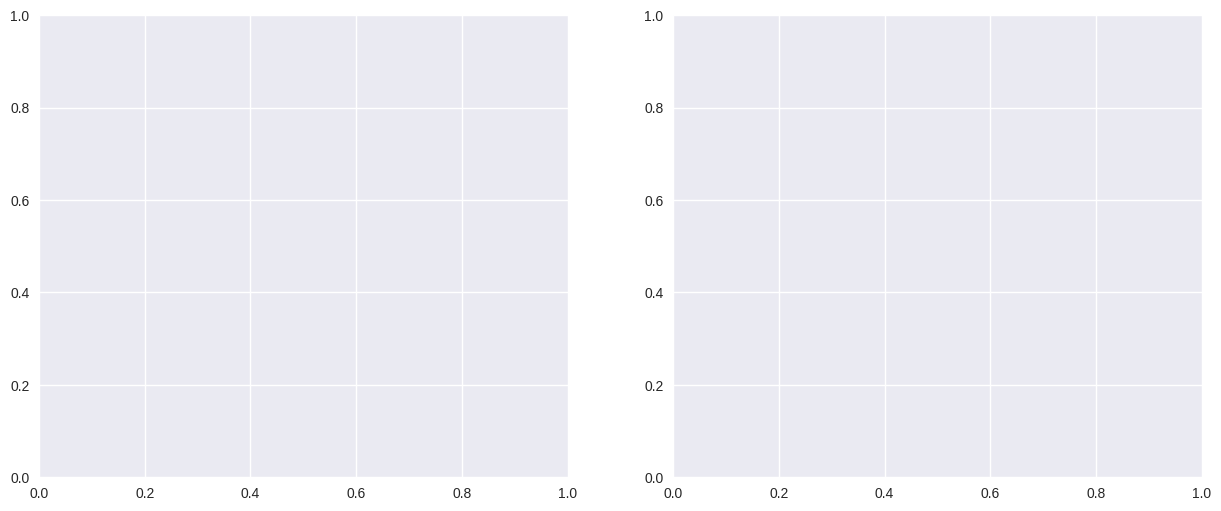

In [44]:
# Residual analysis
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

In [45]:
# Training residuals
ax1.scatter(y_train_pred, residuals_train, alpha=0.6, color='blue')
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('Predicted Price')
ax1.set_ylabel('Residuals')
ax1.set_title('Training Set Residuals')


Text(0.5, 1.0, 'Training Set Residuals')

In [46]:
# Test residuals
ax2.scatter(y_test_pred, residuals_test, alpha=0.6, color='green')
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_xlabel('Predicted Price')
ax2.set_ylabel('Residuals')
ax2.set_title('Test Set Residuals')

plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

**Feature Importance Analysis**

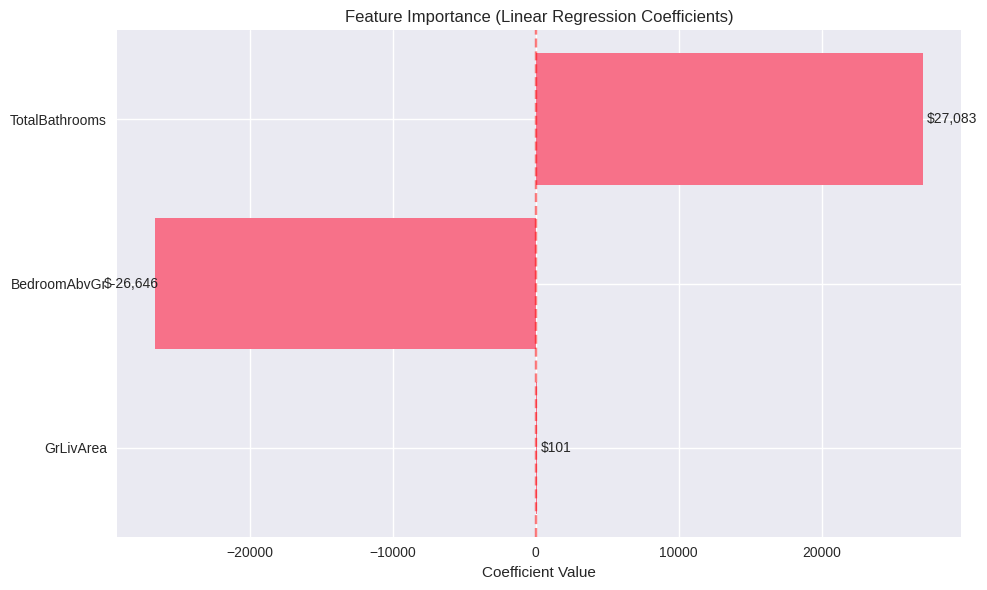

Feature Importance Ranking:
1. GrLivArea: $100.64
2. BedroomAbvGr: $-26,645.53
3. TotalBathrooms: $27,083.21


In [47]:
# Feature importance based on coefficient magnitude
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
})

feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)

for i, v in enumerate(feature_importance['Coefficient']):
    plt.text(v + (max(feature_importance['Coefficient'])*0.01), i, f'${v:,.0f}',
             va='center', ha='left' if v >= 0 else 'right')

plt.tight_layout()
plt.show()

print("Feature Importance Ranking:")
for i, (_, row) in enumerate(feature_importance.iterrows(), 1):
    print(f"{i}. {row['Feature']}: ${row['Coefficient']:,.2f}")

**Making Predictions**

In [48]:
# Function to predict house price
def predict_house_price(sqft, bedrooms, bathrooms):
    """
    Predict house price based on square footage, bedrooms, and bathrooms

    Parameters:
    sqft (int): Square footage of the house
    bedrooms (int): Number of bedrooms
    bathrooms (float): Total bathrooms (full + half*0.5)

    Returns:
    float: Predicted house price
    """
    features = np.array([[sqft, bedrooms, bathrooms]])
    prediction = model.predict(features)[0]
    return prediction

In [49]:
# Example predictions
example_houses = [
    (1500, 3, 2.0),  # 1500 sqft, 3 bedrooms, 2 bathrooms
    (2000, 4, 2.5),  # 2000 sqft, 4 bedrooms, 2.5 bathrooms
    (1200, 2, 1.5),  # 1200 sqft, 2 bedrooms, 1.5 bathrooms
    (2500, 4, 3.0),  # 2500 sqft, 4 bedrooms, 3 bathrooms
]

print("EXAMPLE HOUSE PRICE PREDICTIONS")
print("="*50)
for i, (sqft, beds, baths) in enumerate(example_houses, 1):
    price = predict_house_price(sqft, beds, baths)
    print(f"House {i}: {sqft} sqft, {beds} bed, {baths} bath")
    print(f"Predicted Price: ${price:,.0f}")
    print("-" * 30)

EXAMPLE HOUSE PRICE PREDICTIONS
House 1: 1500 sqft, 3 bed, 2.0 bath
Predicted Price: $182,048
------------------------------
House 2: 2000 sqft, 4 bed, 2.5 bath
Predicted Price: $219,262
------------------------------
House 3: 1200 sqft, 2 bed, 1.5 bath
Predicted Price: $164,961
------------------------------
House 4: 2500 sqft, 4 bed, 3.0 bath
Predicted Price: $283,122
------------------------------


In [50]:
# Interactive prediction function
def interactive_prediction():
    """
    Interactive function to get user input and predict house price
    """
    try:
        print("\\n" + "="*50)
        print("HOUSE PRICE PREDICTION CALCULATOR")
        print("="*50)

        sqft = float(input("Enter square footage: "))
        bedrooms = int(input("Enter number of bedrooms: "))
        bathrooms = float(input("Enter total bathrooms (e.g., 2.5 for 2 full + 1 half): "))

        predicted_price = predict_house_price(sqft, bedrooms, bathrooms)

        print(f"\\n{'='*50}")
        print(f"PREDICTION RESULT")
        print(f"{'='*50}")
        print(f"Square Footage: {sqft:,.0f}")
        print(f"Bedrooms: {bedrooms}")
        print(f"Bathrooms: {bathrooms}")
        print(f"\\nPredicted House Price: ${predicted_price:,.0f}")
        print(f"{'='*50}")

    except ValueError:
        print("Please enter valid numeric values!")
    except Exception as e:
        print(f"An error occurred: {e}")


**Model Summary and Insights**

In [51]:
print("MODEL SUMMARY")
print("="*60)
print(f"Model Type: Linear Regression")
print(f"Features Used: {', '.join(X.columns)}")
print(f"Training Samples: {len(X_train)}")
print(f"Test Samples: {len(X_test)}")
print(f"\\nPerformance Metrics:")
print(f"  - R² Score: {test_r2:.4f} ({test_r2*100:.1f}% variance explained)")
print(f"  - RMSE: ${test_rmse:,.0f}")
print(f"  - MAE: ${test_mae:,.0f}")

print(f"\\nKey Insights:")
print(f"1. Square footage has the strongest impact on price (${model.coef_[0]:,.0f} per sqft)")
if len(model.coef_) > 1:
    print(f"2. Each additional bedroom adds ~${model.coef_[1]:,.0f} to the price")
if len(model.coef_) > 2:
    print(f"3. Each additional bathroom adds ~${model.coef_[2]:,.0f} to the price")

print(f"\\nModel Equation:")
print(f"{equation}")
print("="*60)

MODEL SUMMARY
Model Type: Linear Regression
Features Used: GrLivArea, BedroomAbvGr, TotalBathrooms
Training Samples: 1168
Test Samples: 292
\nPerformance Metrics:
  - R² Score: 0.6286 (62.9% variance explained)
  - RMSE: $53,372
  - MAE: $36,570
\nKey Insights:
1. Square footage has the strongest impact on price ($101 per sqft)
2. Each additional bedroom adds ~$-26,646 to the price
3. Each additional bathroom adds ~$27,083 to the price
\nModel Equation:
Price = 56,863 + 101 × GrLivArea  -26,646 × BedroomAbvGr + 27,083 × TotalBathrooms


**Performing a demonstration to build and evaluate a linear regression model for house price prediction using actual data.**

In [53]:
# create a simple demonstration using the actual data
print("DEMONSTRATION: Linear Regression Model for House Price Prediction")
print("="*70)

# Prepare the data for our model
house_data = train_df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']].copy()

# Create total bathrooms feature
house_data['TotalBathrooms'] = house_data['FullBath'] + house_data['HalfBath'] * 0.5

# Prepare features and target
X = house_data[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']]
y = house_data['SalePrice']

print(f"Dataset shape: {X.shape}")
print(f"Features used: {list(X.columns)}")
print(f"Target variable: SalePrice")
print(f"Price range: ${y.min():,} to ${y.max():,}")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nMODEL PERFORMANCE:")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Training RMSE: ${train_rmse:,.0f}")
print(f"Test RMSE: ${test_rmse:,.0f}")

print(f"\nMODEL COEFFICIENTS:")
print(f"Intercept: ${model.intercept_:,.0f}")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: ${coef:,.2f}")

# Create the equation
equation = f"Price = {model.intercept_:,.0f}"
for feature, coef in zip(X.columns, model.coef_):
    sign = "+" if coef >= 0 else ""
    equation += f" {sign} {coef:,.0f} × {feature}"

print(f"\nLINEAR REGRESSION EQUATION:")
print(equation)

DEMONSTRATION: Linear Regression Model for House Price Prediction
Dataset shape: (1460, 3)
Features used: ['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']
Target variable: SalePrice
Price range: $34,900 to $755,000

MODEL PERFORMANCE:
Training R² Score: 0.5623
Test R² Score: 0.6286
Training RMSE: $51,093
Test RMSE: $53,372

MODEL COEFFICIENTS:
Intercept: $56,863
GrLivArea: $100.64
BedroomAbvGr: $-26,645.53
TotalBathrooms: $27,083.21

LINEAR REGRESSION EQUATION:
Price = 56,863 + 101 × GrLivArea  -26,646 × BedroomAbvGr + 27,083 × TotalBathrooms


**Estimating house prices based on features using a trained linear regression model and example predictions.**

In [54]:
# example predictions
def predict_house_price(sqft, bedrooms, bathrooms):
    """Predict house price based on square footage, bedrooms, and bathrooms"""
    features = np.array([[sqft, bedrooms, bathrooms]])
    prediction = model.predict(features)[0]
    return prediction

print("\nEXAMPLE PREDICTIONS:")
print("="*50)

# Example houses
examples = [
    (1500, 3, 2.0, "Typical family home"),
    (2000, 4, 2.5, "Larger family home"),
    (1200, 2, 1.5, "Starter home"),
    (2500, 4, 3.0, "Luxury home"),
    (800, 1, 1.0, "Small apartment/condo")
]

for sqft, beds, baths, description in examples:
    price = predict_house_price(sqft, beds, baths)
    print(f"{description}:")
    print(f"  - {sqft:,} sqft, {beds} bed, {baths} bath")
    print(f"  - Predicted Price: ${price:,.0f}")
    print()

# Show feature importance
print("FEATURE IMPACT ON PRICE:")
print("="*50)
print(f"1. Square Footage: ${model.coef_[0]:,.0f} per sq ft")
print(f"2. Total Bathrooms: ${model.coef_[2]:,.0f} per bathroom")
print(f"3. Bedrooms: ${model.coef_[1]:,.0f} per bedroom")
print("\nNote: Negative coefficient for bedrooms suggests that for a given")
print("square footage, houses with more bedrooms may have smaller individual")
print("rooms, which could reduce the overall value per square foot.")


EXAMPLE PREDICTIONS:
Typical family home:
  - 1,500 sqft, 3 bed, 2.0 bath
  - Predicted Price: $182,048

Larger family home:
  - 2,000 sqft, 4 bed, 2.5 bath
  - Predicted Price: $219,262

Starter home:
  - 1,200 sqft, 2 bed, 1.5 bath
  - Predicted Price: $164,961

Luxury home:
  - 2,500 sqft, 4 bed, 3.0 bath
  - Predicted Price: $283,122

Small apartment/condo:
  - 800 sqft, 1 bed, 1.0 bath
  - Predicted Price: $137,810

FEATURE IMPACT ON PRICE:
1. Square Footage: $101 per sq ft
2. Total Bathrooms: $27,083 per bathroom
3. Bedrooms: $-26,646 per bedroom

Note: Negative coefficient for bedrooms suggests that for a given
square footage, houses with more bedrooms may have smaller individual
rooms, which could reduce the overall value per square foot.


**Linear regression model performance and results for house price prediction**

In [59]:
import plotly.graph_objects as go
import numpy as np

# Data from the provided JSON
actual_prices = [208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000, 129500, 345000, 144000, 279500, 157000, 132000, 149000, 90000, 159000, 139000, 325300, 139400, 230000, 129900, 154000, 256300, 134800, 306000, 207500, 68500]
predicted_prices = [216284, 159063, 207720, 172218, 267431, 138370, 219169, 252296, 129482, 108854, 129858, 299618, 110637, 189909, 153692, 109283, 129564, 129525, 145413, 135547, 295543, 143970, 230322, 135842, 142351, 287763, 120394, 280011, 190992, 79244]
r2_score = 0.6286
rmse = 53372

# Convert to arrays and scale to thousands for display
actual_k = np.array(actual_prices) / 1000
predicted_k = np.array(predicted_prices) / 1000
rmse_k = rmse / 1000

# Create scatter plot
fig = go.Figure()

# Add scatter points
fig.add_trace(go.Scatter(
    x=actual_k,
    y=predicted_k,
    mode='markers',
    name='Predictions',
    marker=dict(color='#1FB8CD', size=8, opacity=0.7),
    hovertemplate='Actual: %{x:.0f}k<br>Pred: %{y:.0f}k<br>Error: %{customdata:.0f}k<extra></extra>',
    customdata=np.abs(actual_k - predicted_k)
))

# Add perfect prediction line (y=x)
min_price = min(min(actual_k), min(predicted_k))
max_price = max(max(actual_k), max(predicted_k))
line_range = np.linspace(min_price * 0.95, max_price * 1.05, 100)
fig.add_trace(go.Scatter(
    x=line_range,
    y=line_range,
    mode='lines',
    name='Perfect Line',
    line=dict(color='#DB4545', dash='dash', width=2),
    hovertemplate='Perfect Match<extra></extra>'
))

# Update layout with comprehensive title including metrics
fig.update_layout(
    title=f'Model Results: R²={r2_score:.3f}, RMSE={rmse_k:.0f}k',
    xaxis_title='Actual Price ($k)',
    yaxis_title='Pred Price ($k)',
    legend=dict(orientation='h', yanchor='bottom', y=1.05, xanchor='center', x=0.5)
)

# Update traces
fig.update_traces(cliponaxis=False)

# Format axes
fig.update_xaxes(tickformat='.0f')
fig.update_yaxes(tickformat='.0f')

# Ensure equal aspect ratio for better interpretation
fig.update_layout(
    xaxis=dict(constrain='domain'),
    yaxis=dict(scaleanchor='x', scaleratio=1)
)

